[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya//DataLiteracy/blob/master/Cohete.ipynb)

# Movimiento vertical de un cohete

Página realizada empleando la herramienta Google Colab para presentar un caso de modelado de un fenómeno físico empleando Python.

Por:

Ferney Amaya Fernández <br>
https://ferneyoamaya.github.io/
<br><br>

## Descripción

La ecuación de movimiento del cohete:

$$\large m\frac{dv}{dt} =uD-mg $$

donde:
- $m [kg]$, la masa del cohete que en el instante t es $m=m_0-D.t$.
- $m_0 [kg]$, masa inicial del cohete igual a la carga útil más la masa del combustible.
- $D [kg/s]$, masa expulsada por segundo.
- $u [m/s]$, velocidad de salida de gases.
- $g [m/s^2]$, aceleración de la gravidad, considerada constante.

<br>
A partir de la ecuación anterior puede obtenerse:
<br>
$$\large v = v_0-gt + uln\frac{m_0}{m_0-Dt}$$
<br>
$$\large x = x_0+v_0t-gt^2+uln(m_0)+\frac{u}{D}[(m_0-Dt)ln(m_0-Dt)+Dt-m_0ln(m_0)]$$
<br>
Información tomada de:

http://www.sc.ehu.es/sbweb/fisica/dinamica/cohete3/cohete3.html

## Modelo en Python
Las ecuaciones anteriores se modelan en Python para poder observar variaciones en la altura, masa y velocidad del cohete a partir de vaciaciones en:
- Masa inicial de combustible [Kg].
- Masa expulsada por segundo [Kg/s].


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Masa_util = '1 kg'  #@param {type: "string"}
Masa_combustible  = 27  #@param {type: "slider", min: 1, max: 50}
Masa_expulsada = 0.31  #@param {type: "slider", min: 0.01, max: 1,step:0.01}

Du = Masa_expulsada    #[Kg/s] Masa expulsada/segundo   0.1
mutil = 1              #[Kg]   Masa carga útil
mt = Masa_combustible + mutil #[Kg]   Masa inicial total   3

tpaso_a = 100    
tpaso = 5
angulo = 0
uu = 1000        

D = Du
u = uu
m0 = mt
y0 = 0
v0 = 0
g0 = 9.8

tc = (m0 - mutil)/D

m = m0 - D*tc   
vc = v0 - g0*tc + u*np.log(m0/m)      
yc = y0 + v0*tc - 0.5*g0*tc*tc + u*tc*np.log(m0) + (u/D)*(m*np.log(m)+D*tc-m0*np.log(m0))
tcae = (vc + np.sqrt(vc*vc + 2*g0*yc))/g0
yf = yc + vc*tcae - 0.5*g0*tcae*tcae

ti = np.arange(0,tc+0.5,0.5)
m = m0 - D*ti    
vi = v0 - g0*ti + u*np.log(m0/m)      
yi = y0 + v0*ti - 0.5*g0*ti*ti + u*ti*np.log(m0) + (u/D)*(m*np.log(m)+D*ti-m0*np.log(m0))

mv = m
m0 = mutil
m = mutil
y0 = yc
v0 = vc

td = np.arange(0.5,tcae+0.5,0.5)
vd = v0 - g0*td     
yd = y0 + v0*td - 0.5*g0*td*td

tamax = v0/g0
ymax = y0 + v0*tamax - 0.5*g0*tamax*tamax

td = ti[-1] + td
tv = np.concatenate((ti, td), axis=0)
v = np.concatenate((vi, vd), axis=0)
y = np.concatenate((yi, yd), axis=0)
mtem = mutil*np.ones((len(td),))
m = np.concatenate((mv, mtem), axis=0)

In [3]:
#@title Resultados:
print('Empuje={:3.1f}N   Peso={:5.1f}N'.format(u*D,m0*g0))
print('Tiempo con combustible : {:>5.1f}s'.format(tc))
print('Tiempo para caer       : {:>5.1f}s'.format(tcae))
print('Altura final           : {:>5.1f}km'.format(yf))
print('Altura máxima          : {:>5.1f}km'.format(ymax/1000))

Empuje=310.0N   Peso=  9.8N
Tiempo con combustible :  87.1s
Tiempo para caer       : 521.2s
Altura final           :   0.0km
Altura máxima          : 352.6km


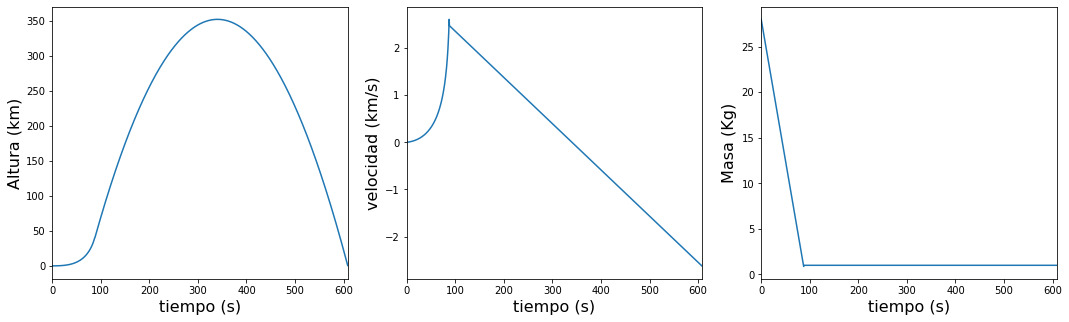

In [ ]:
#@title Gráficas
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].plot(tv, y/1000)
ax[0].set_xlim((0, tc+tcae))
ax[0].set_xlabel('tiempo (s)', fontsize=16)
ax[0].set_ylabel('Altura (km)', fontsize=16)
ax[1].plot(tv, v/1000)
ax[1].set_xlim((0, tc+tcae))
ax[1].set_xlabel('tiempo (s)', fontsize=16)
ax[1].set_ylabel('velocidad (km/s)', fontsize=16)
ax[2].plot(tv, m)
ax[2].set_xlim((0, tc+tcae))
ax[2].set_xlabel('tiempo (s)', fontsize=16)
ax[2].set_ylabel('Masa (Kg)', fontsize=16)
fig.show()

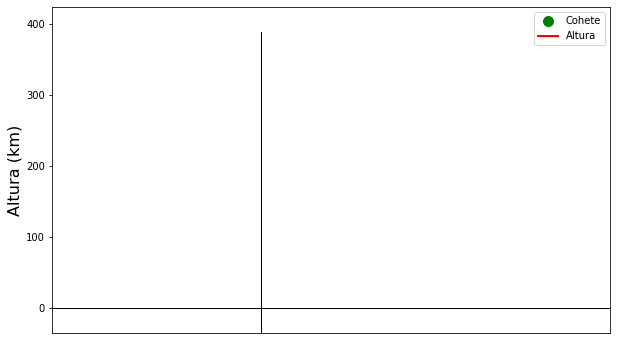

In [4]:
#@title Figura de base
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim((0, 2))            
ax.set_ylim((-0.1*ymax/1000, ymax*1.2/1000))
ax.set_ylabel('Altura (km)', fontsize=16)
ax.get_xaxis().set_visible(False)

txt_title = ax.set_title('')
pt1, = ax.plot([], [], 'g.', ms=20)
pt2, = ax.plot([], [], 'r', lw=2, ms=20)
pt3, = ax.plot([], [], 'b--', lw=1)
        
ax.set_ylim((-0.1*ymax/1000, ymax*1.2/1000))

xpta = np.arange(0,2+0.1,0.1)
ypta = np.zeros((len(xpta),1))
ax.plot(xpta,ypta,'k',lw=1)
ypta = np.arange(-0.1*ymax/1000,ymax*1.2/1000,ymax/1000/10)
xpta = 0.75*np.ones((len(ypta),1))
ax.plot(xpta,ypta,'k',lw=1)

txan1 = ax.annotate('', xy=(0, 0))
txan1.set_animated(True)
txan2 = ax.annotate('', xy=(0, 0))
txan2.set_animated(True)
ax.legend(['Cohete','Altura']);

In [5]:
#@title Video
D = Du
u = uu
m0 = mt
x0 = 0
v0 = 0
g0 = 9.8
t0 = 0
f = 0
ntot = round((tc+tcae)/tpaso)
def drawframe(n):
    global x0, v0, f, t0, m, x, v, D, u
    tr= n*tpaso        
    t = tr - t0  
    m = m0 - D*t
    if t >= tc and f==0:
      v0 = vc
      x0 = yc
      t0 = tc
      t = 0
      D = 0
      u = 0
      f = 1
    if f == 0:
      v = v0 - g0*t + u*np.log(m0/m)
      x = x0 + v0*t - 0.5*g0*t*t + u*t*np.log(m0) + (u/D)*(m*np.log(m)+D*t-m0*np.log(m0))
    else:
      m = mutil
      v = v0 - g0*t
      x = x0 + v0*t - 0.5*g0*t*t
    xkm = x/1000
    vkm = v/1000
    pt1.set_data(0.25, xkm)
    it = tv.tolist().index(tr)
    tg2= tv[0:it]/(tc+tcae)/2 + 0.75
    yg2= y[0:it]/1000
    pt2.set_data(tg2,yg2)
    xg3= np.arange(0,2+0.1,0.1)
    yg3= xkm*np.ones((len(xg3),1))
    pt3.set_data(xg3,yg3)
    txan1.set_position((0.05,xkm-10))
    txan1.set_text('\u2191E {:3.1f}N\n\u2193P {:3.1f}N'.format(u*D,m0*g0))
    txan2.set_position((0.3,xkm-10))
    txan2.set_text('v {:3.1f}km\s \n{:3.1f}kgs'.format(v/1000,m))
    txt_title.set_text('Trama {:3d}; Tiempo {:3d}s/{:3d}s'.format(n,tr,int(tc+tcae)))
    return pt1, pt2, pt3, txan1, txan2
from matplotlib import animation

anim = animation.FuncAnimation(fig, drawframe, frames=ntot, interval=tpaso_a, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

# Peso y fricción

Página realizada empleando la herramienta Google Colab para presentar un caso de modelado de un fenómeno físico empleando Python.

## Descripción

Para un objeto que cae:

- $\rho_f [kg/m^3]$, densidad del medio.
- $\rho_e [kg/m^3]$, densidad del objeto que cae en el medio.
- $\eta [kg/(m.s)]$, viscosidad.
- $R [m]$, radio del objeto, asumiendo que es esférico.
- $g [m/s^2]$, aceleración de la gravedad.

Se define:
$$\large G = (1 - (\rho_f / \rho_e))g$$
$$\large k = \frac{9 \eta}{2 \rho_e R^2}$$

La ecuación de movimiento:

$$\large \frac{dv}{dt} = G - k v $$

<br>
A partir de la ecuación anterior pueden obtenerse las ecuaciones para la velocidad y la posición:
<br>
$$\large v = \frac{G}{k} (1 - e^{-kt})$$
<br>
$$\large x = \frac{G}{k}t + \frac{G}{k^2}(e^{-kt} - 1)$$
<br>

Tomado de:
- Notas de clase profesor Juan Serna
- http://www.sc.ehu.es/sbweb/fisica3/fluidos/stokes/stokes.html

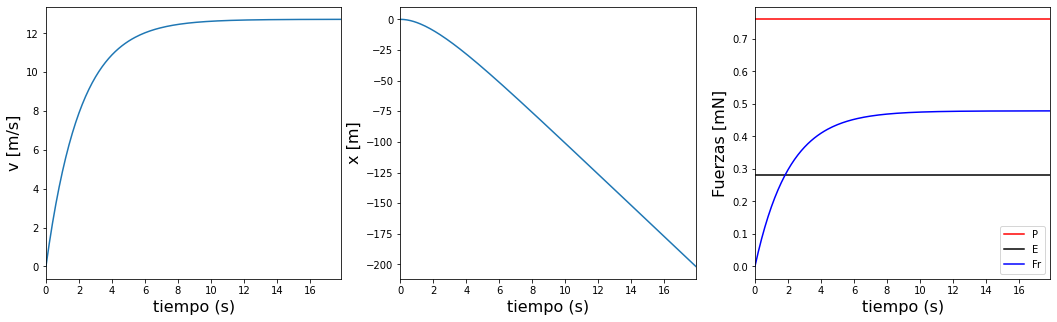

In [6]:
#@title Gráficas
import numpy as np
import matplotlib.pyplot as plt

tpaso2 = 0.1
tpaso_a2 = 100     #[ms]   Tiempo de paso animación
rho_f = 1000       #kg/m^3 densidad, agua
nv = 0.00105       #kg/(m.s) viscosidad
rho_e = 2700       #kg/m^3 densidad, aluminio
R = 1.9e-3         #m Radio, esfera
g = 9.8            #m/s^2, gravedad

G = (1-rho_f/rho_e)*g
k = 9*nv/(2*rho_e*R**2)

t = np.arange(0, 18, tpaso2)
v = (G/k)*(1 - np.exp(-k*t))
x = (G/k)*t + (G/k**2)*(np.exp(-k*t) - 1)
x = - x

V = (4/3)*np.pi*R**3             
m = rho_e*V                     
P = m*g        
E = rho_f*V*g  
Pv = P*np.ones((len(t),1))      
Ev = E*np.ones((len(t),1)) 
Frv = 6*np.pi*R*nv*v                

fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].plot(t, v)
ax[0].set_xlim((0, t[-1]))
ax[0].set_xlabel('tiempo (s)', fontsize=16)
ax[0].set_ylabel('v [m/s]', fontsize=16)
ax[1].plot(t, x)
ax[1].set_xlim((0, t[-1]))
ax[1].set_xlabel('tiempo (s)', fontsize=16)
ax[1].set_ylabel('x [m]', fontsize=16)
ax[2].plot(t, Pv*1000,'r')
ax[2].plot(t, Ev*1000,'k')
ax[2].plot(t, Frv*1000,'b')
ax[2].set_xlim((0, t[-1]))
ax[2].set_xlabel('tiempo (s)', fontsize=16)
ax[2].set_ylabel('v [m/s]', fontsize=16)
ax[2].set_ylabel('Fuerzas [mN]', fontsize=16)
ax[2].legend(['P','E','Fr'])
fig.show()

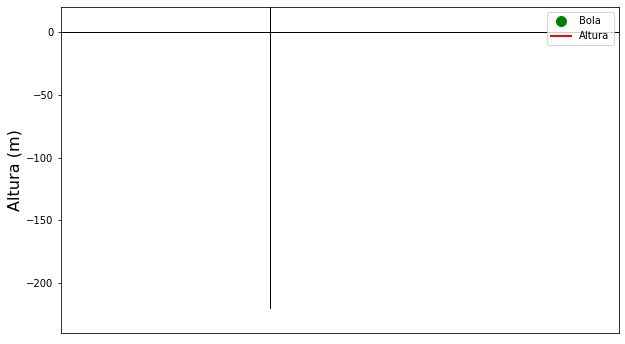

In [7]:
#@title Figura de base
fig, ax = plt.subplots(figsize=(10, 6))
ymax = -200
ax.set_xlim((0, 2))           
ax.set_ylim(bottom=ymax*1.2,top=-0.1*ymax)
ax.set_ylabel('Altura (m)', fontsize=16)
ax.get_xaxis().set_visible(False)

txt_title = ax.set_title('')
pt1, = ax.plot([], [], 'g.', ms=20)
pt2, = ax.plot([], [], 'r', lw=2, ms=20)
pt3, = ax.plot([], [], 'b--', lw=1)

xpta = np.arange(0,2+0.1,0.1)
ypta = np.zeros((len(xpta),1))
ax.plot(xpta,ypta,'k',lw=1)
ypta = np.arange(-0.1*ymax,ymax*1.2,ymax/10)
xpta = 0.75*np.ones((len(ypta),1))
ax.plot(xpta,ypta,'k',lw=1)

txan1 = ax.annotate('', xy=(0, 0))
txan1.set_animated(True)
txan2 = ax.annotate('', xy=(0, 0))
txan2.set_animated(True)
ax.legend(['Bola','Altura'], loc='upper right');

In [8]:
#@title Video
ntot2 = round(t[-1]/tpaso2)
P2 = P*1e6
E2 = E*1e6
def drawframe(n):
    tr2 = n*tpaso2       
    vp = (G/k)*(1 - np.exp(-k*tr2))
    xp = (G/k)*tr2 + (G/k**2)*(np.exp(-k*tr2) - 1)
    xp = - xp 
    Fr = 6*np.pi*R*nv*vp
    Fr2 = Fr*1e6
    pt1.set_data(0.35, xp)
    it = t.tolist().index(tr2)
    tg2= t[0:it]/t[-1] + 0.75
    xg2= x[0:it]
    pt2.set_data(tg2,xg2)
    tg3= np.arange(0,2+0.1,0.1)
    xg3= xp*np.ones((len(tg3),1))
    pt3.set_data(tg3,xg3)
    txan1.set_position((0.09,xp-8))
    txan1.set_text('\u2191E+Fr {:.0f}uN\n\u2193 P     {:.0f}uN'.format(E2+Fr2,P2))
    txan2.set_position((0.4,xp-8))
    txan2.set_text('v {:5.2f}m\s \n'.format(vp))
    txt_title.set_text('Trama {:d}; Tiempo {:.1f}s/{:.1f}s'.format(n,tr2,t[-1]))
    return pt1, pt2, pt3, txan1, txan2

from matplotlib import animation
anim = animation.FuncAnimation(fig, drawframe, frames=ntot2, interval=tpaso_a, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())